In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

df_job = pd.read_csv("../data/misgrosi_job1108.csv")
df_candidate = pd.read_csv('../data/misgrosi1108.csv')
df_density = pd.read_csv('../../density.csv')

In [2]:
def stadt(row):
    try:
        post_stadt = row['Location'].split()

        if len(post_stadt) == 2 :
            val = post_stadt[1]
        elif not post_stadt[0].isdigit():
            val = post_stadt[0]
        else:
            val = None
    except:
        val = None
    return val
        
df_job['Stadt'] = df_job.apply(stadt, axis=1)
df_candidate['Stadt'] = df_candidate.apply(stadt, axis=1)
df_job.head()

,Unnamed: 0,Position,Company,Location,Job Type,Stadt,Post Code
0,0,Oma gesucht in Basel\r\nSilMa,SilMa,4056 Basel,Grosi & Opi,Basel,4056.0
1,1,Grosi gesucht in Hünenberg\r\nLuca2013,Luca2013,6331 Hünenberg,Grosi & Opi,Hünenberg,6331.0
2,2,Ein Herzens-Grosi gesucht zum Aufbau einer lie...,Calendula,8165 Schöfflisdorf,Grosi & Opi,Schöfflisdorf,8165.0
3,3,Wir suchen eine langfristige Ergänzung unseres...,Laura B.,8608 Bubikon,Grosi & Opi,Bubikon,8608.0
4,4,Grosi gesucht in Dübendorf\r\nTamaraa,Tamaraa,8600 Dübendorf,Babysitting,Dübendorf,8600.0


In [3]:
df_candidate.head()

,Name,Intro,Location,Role,Stadt
0,Wunsch-Grosi Gaby,Ich möchte einem Kind Zeit und Aufmerksamkeit ...,8053 Zür,Oma & Opa Kinderbetreuung,Zür
1,Dawn,Begleitung auf den Spielplatz oder Zoo etc.,6010 Kriens,Tages-Grosi,Kriens
2,Wunsch-Grosi Nani,"Aktive, reife Frau sucht Aufgabe als Kinderbet...",4056 Basel,Grosi als Nanny / Haushaltshilfe,Basel
3,Nani Moni,Einfach ein lässiges Grosi sy,4900 Langenthal,Tages-Grosi,Langenthal
4,Jida,Betreue Kinder aus allen Kulturen,4051 Basel,Tages-Grosi,Basel


In [4]:
def post(row):
    try:
        post_stadt = row['Location'].split()
        if post_stadt[0].isdigit():
            val = int(post_stadt[0])
        else:
            val = None
    except:
        val = str(row['Location'])
    
    return val
        
df_job['Post Code'] = df_job.apply(post, axis=1)

In [5]:
df_candidate['Post Code'] = df_candidate.apply(post, axis=1)

In [6]:
df_job_count = df_job.groupby(['Post Code']).size().reset_index(name = 'number')
df_job_count
max_number = df_job_count['number'].max()
max_number

16

In [7]:
df_candidate_count = df_candidate.groupby(['Post Code']).size().reset_index(name = 'Counts')
df_candidate_count
max=df_candidate_count['Counts'].max()
max

2

In [8]:
# Convert 'Post Code' column to a common numeric type (Int64) to handle NaN values
df_job_count['Post Code'] = pd.to_numeric(df_job_count['Post Code'], errors='coerce', downcast='integer')
df_candidate_count['Post Code'] = pd.to_numeric(df_candidate_count['Post Code'], errors='coerce', downcast='integer')

# Merge the two DataFrames based on the 'Post Code' column using an outer join
df = df_job_count.merge(df_candidate_count, on='Post Code', how='outer')

# Fill any missing (NaN) values with 0
df = df.dropna(subset=['Counts'])
df=df.dropna(subset=['number'])


In [9]:
df=df.merge(df_density,on="Post Code", how="inner")
df = df.dropna(subset = ['Density'])
df['jobs_per_capita'] = df['number']/df['Population']
df['candidate_per_capita'] = df['Counts']/df['Population']
df

,Post Code,number,Counts,Unnamed: 0,City,Region,Area,Population,Density,jobs_per_capita,candidate_per_capita
0,2540.0,2.0,1.0,1588,NaN,Canton of Solothurn,26.000,17939.0,689.961538,0.000111,0.000056
1,3027.0,2.0,1.0,1030,NaN,Canton of Bern,6.300,12732.0,2020.952381,0.000157,0.000079
2,3052.0,1.0,1.0,1052,NaN,Canton of Bern,6.400,12273.0,1917.656250,0.000081,0.000081
3,3053.0,2.0,1.0,1053,Münchenbuchsee,Canton of Bern,14.900,10004.0,671.409396,0.000200,0.000100
4,3063.0,1.0,1.0,1055,Ittigen,Canton of Bern,3.360,9864.0,2935.714286,0.000101,0.000101
5,3084.0,1.0,1.0,1071,NaN,Canton of Bern,4.527,8006.0,1768.500110,0.000125,0.000125
7,4052.0,5.0,1.0,1456,Basel,Basel-Stadt,4.373,21710.0,4964.555225,0.000230,0.000046
8,4056.0,4.0,1.0,1460,Basel,Basel-Stadt,2.593,20841.0,8037.408407,0.000192,0.000048
9,4057.0,5.0,2.0,1461,Basel,Basel-Stadt,3.512,26744.0,7615.034169,0.000187,0.000075
10,4125.0,4.0,2.0,1489,NaN,NaN,10.900,21946.0,2013.394495,0.000182,0.000091


In [10]:
def draw_worker_density(xv,yv,df):
    plt.figure(figsize=(10, 6), dpi=80)
    ax = sns.scatterplot(x=xv, y=yv, data=df)
    ax.set_title('Misgrosi')
    #ax.set_yscale('log')
    #ax.set_xscale('log')
    ax.set_xlabel('candidate_per_capita')
    ax.set_ylabel('jobs_per_capita')

In [11]:
from scipy import stats
def draw_corr(df,col1, col2):
    draw_worker_density(col1,col2,df)
    p = stats.pearsonr(df[col1], df[col2])
    s = stats.spearmanr(df[col1], df[col2])
    k = stats.kendalltau(df[col1], df[col2])
    print(f'pearson r: {p[0]}, p value: {p[1]}')
    print(f'Spearman rho: {s[0]}, p value: {s[1]}')
    print(f'kendall tau: {k[0]}, p value: {k[1]}')

pearson r: 0.4842396714971961, p value: 0.00017971084996832305
Spearman rho: 0.3976190476190477, p value: 0.0026462206715993923
kendall tau: 0.2861952861952862, p value: 0.002033438304676458


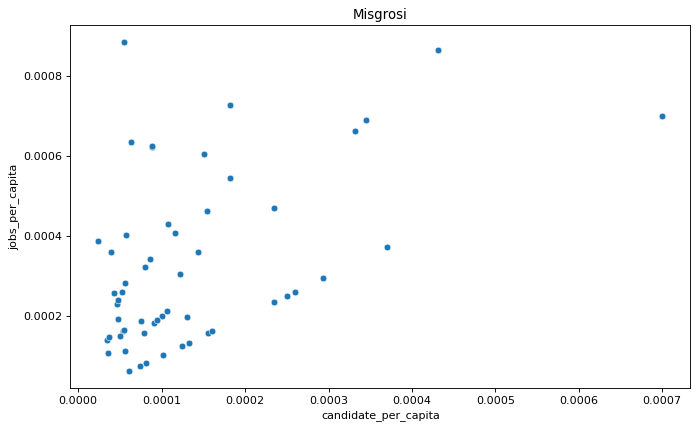

In [12]:
draw_corr(df,'candidate_per_capita','jobs_per_capita')